## Naive-Bayes

- Probablistic Classifier
- P(A|B) = P(B|A) * P(A) / P(B)
 - P(B|A) = probability of B being true, given that A is true
 - P(A) = probability of A being true
 - P(B) = probability of B being true
 
**This Algo takes naive independent assumptions of features and attributes and works on them, giving the probability of them being true or false** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
#glucose, BP, skin thickness, insulin and BMI cannot be 0. So replace them with NaN
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)
print(df.isna().sum())
df.describe()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
#instead of having those null values, replace them with the median value of the corresponding column
# Ex, replace a nan value of GLUCOSE column with its median
df.fillna(df.median(), inplace=True)

df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

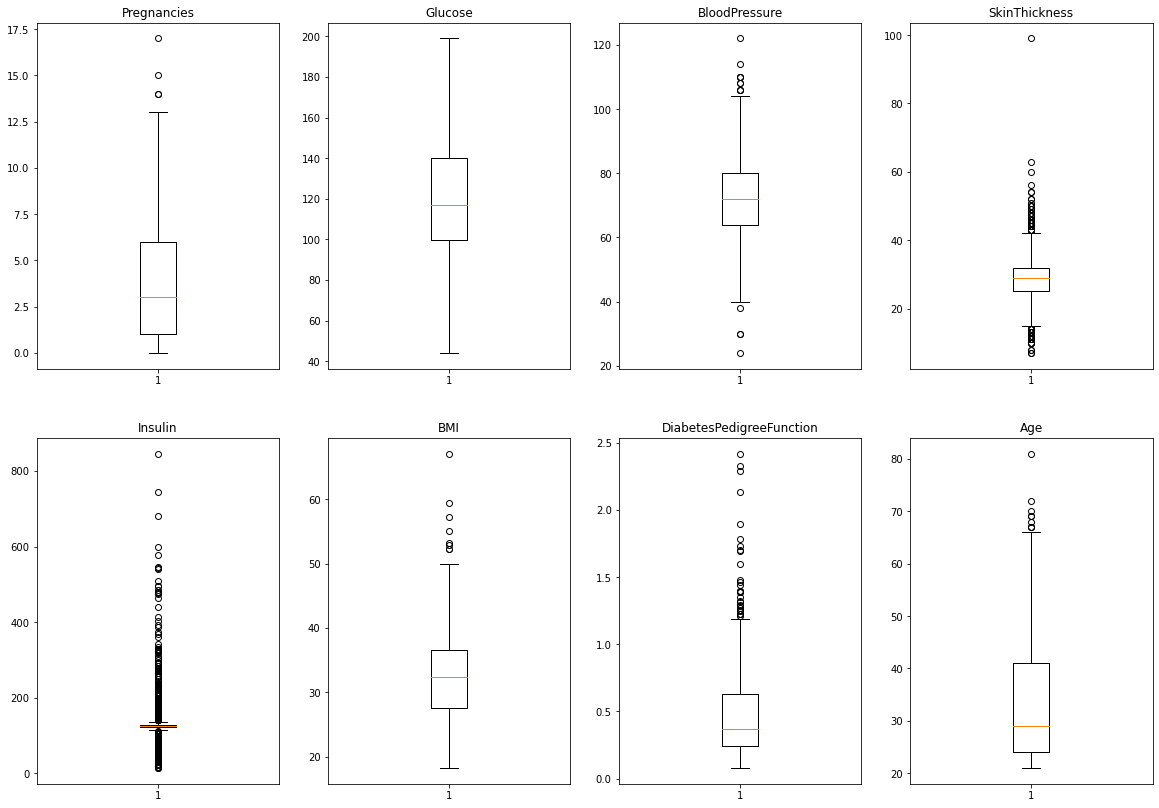

In [35]:
plt.figure(figsize=(20,14))

plt.subplot(2,4,1)
plt.title('Pregnancies')
plt.boxplot(df['Pregnancies'])

plt.subplot(2,4,2)
plt.title('Glucose')
plt.boxplot(df['Glucose'])

plt.subplot(2,4,3)
plt.title('BloodPressure')
plt.boxplot(df['BloodPressure'])

plt.subplot(2,4,4)
plt.title('SkinThickness')
plt.boxplot(df['SkinThickness'])

plt.subplot(2,4,5)
plt.title('Insulin')
plt.boxplot(df['Insulin'])

plt.subplot(2,4,6)
plt.title('BMI')
plt.boxplot(df['BMI'])

plt.subplot(2,4,7)
plt.title('DiabetesPedigreeFunction')
plt.boxplot(df['DiabetesPedigreeFunction'])

plt.subplot(2,4,8)
plt.title('Age')
plt.boxplot(df['Age'])

plt.show()

### Glucose has even distribution of data points, hence no outliers. Insulin has the maximum outliers. These outliers may affect the prediction. We need to get rid of them.

In [36]:
df['Pregnancies']=df['Pregnancies'].clip(lower=df['Pregnancies'].quantile(0.05), upper=df['Pregnancies'].quantile(0.95))
df['BloodPressure']=df['BloodPressure'].clip(lower=df['BloodPressure'].quantile(0.05), upper=df['BloodPressure'].quantile(0.95))
df['SkinThickness']=df['SkinThickness'].clip(lower=df['SkinThickness'].quantile(0.05), upper=df['SkinThickness'].quantile(0.95))
df['Insulin']=df['Insulin'].clip(lower=df['Insulin'].quantile(0.05), upper=df['Insulin'].quantile(0.95))
df['DiabetesPedigreeFunction']=df['DiabetesPedigreeFunction'].clip(lower=df['DiabetesPedigreeFunction'].quantile(0.05), upper=df['DiabetesPedigreeFunction'].quantile(0.95))
df['Age']=df['Age'].clip(lower=df['Age'].quantile(0.05), upper=df['Age'].quantile(0.95))
df['BMI']=df['BMI'].clip(lower=df['BMI'].quantile(0.05), upper=df['BMI'].quantile(0.95))

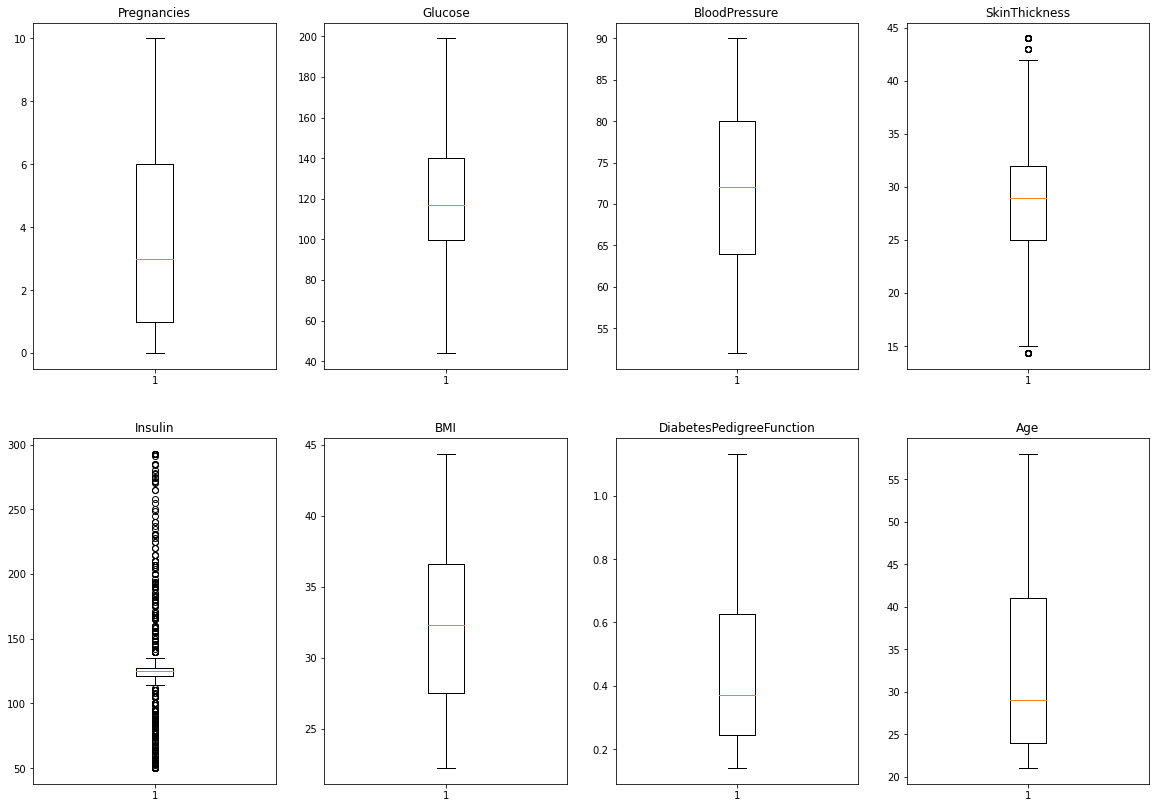

In [37]:
plt.figure(figsize=(20,14))

plt.subplot(2,4,1)
plt.title('Pregnancies')
plt.boxplot(df['Pregnancies'])

plt.subplot(2,4,2)
plt.title('Glucose')
plt.boxplot(df['Glucose'])

plt.subplot(2,4,3)
plt.title('BloodPressure')
plt.boxplot(df['BloodPressure'])

plt.subplot(2,4,4)
plt.title('SkinThickness')
plt.boxplot(df['SkinThickness'])

plt.subplot(2,4,5)
plt.title('Insulin')
plt.boxplot(df['Insulin'])

plt.subplot(2,4,6)
plt.title('BMI')
plt.boxplot(df['BMI'])

plt.subplot(2,4,7)
plt.title('DiabetesPedigreeFunction')
plt.boxplot(df['DiabetesPedigreeFunction'])

plt.subplot(2,4,8)
plt.title('Age')
plt.boxplot(df['Age'])

plt.show()

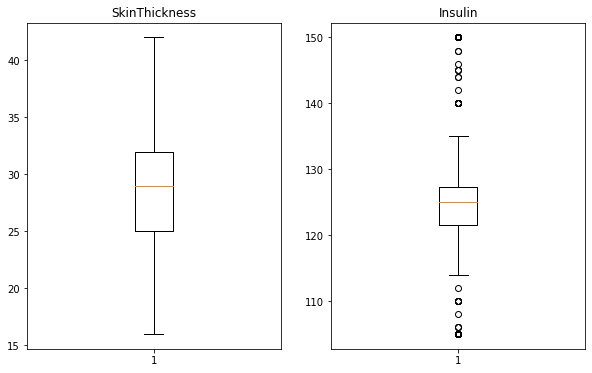

In [39]:
df['SkinThickness']=df['SkinThickness'].clip(lower=df['SkinThickness'].quantile(0.07), upper=df['SkinThickness'].quantile(0.93))
df['Insulin']=df['Insulin'].clip(lower=df['Insulin'].quantile(0.20), upper=df['Insulin'].quantile(0.80))

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.title('SkinThickness')
plt.boxplot(df['SkinThickness'])

plt.subplot(1,2,2)
plt.title('Insulin')
plt.boxplot(df['Insulin'])

plt.show()

**Majority of the attributes have been cleaned. INSULIN may require clipping from 40(lower) - 60(upper) which is very high.**

**What's the point of taking dataset, if we make-up most of our own values, nohh?!! :(**

**We got rid of 0 values by replacing them with nan and then nan with the median**

**Then got rid of outliers by limiting the data points from 5-95 and 20-80**

**So, MOVE ON!!**

C:\Users\ankan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, '0:Non-Diabetic | 1:Diabetic')

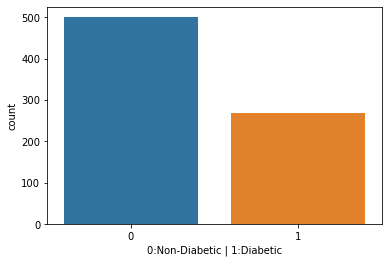

In [54]:
sns.countplot(df['Outcome'])
plt.xlabel('0:Non-Diabetic | 1:Diabetic')

## Model Creation

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [56]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
y_test.shape

(614, 8)
(154, 8)
(614,)


(154,)

In [59]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [60]:
y_pred = nb.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.7727272727272727


array([[90, 19],
       [16, 29]], dtype=int64)

**Accuracy: 77.27%**

- TP: 90
- FP: 19
- FN: 16
- TN: 29